In [5]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

psm_df = pd.read_csv('data/TMT_QC/psm.tsv', delimiter = "\t")
# prot_df = prot_df.drop(['Entry Name', 'Gene', 'Length', 'Organism', 'Protein Description', 'Protein Existence', 'Protein Probability', 'Top Peptide Probability',
#                        'Total Peptides', 'Unique Peptides', 'Razor Peptides', 'Total Spectral Count', 'Unique Spectral Count',
#                        'Razor Spectral Count', 'Total Intensity', 'Unique Intensity', 'Razor Intensity', 'Razor Assigned Modifications',
#                        'Razor Observed Modifications', 'Indistinguishable Proteins'], axis=1)

psm_df = psm_df.rename(columns={'sample-01': '126', 'sample-02': '127C', 'sample-03': '127N', 'sample-04': '128C', 'sample-05': '128N',
                               'sample-06': '129C', 'sample-07': '129N', 'sample-08': '130C', 'sample-09': '130N', 'sample-10': '131C', 'sample-11': '131N',
                               'sample-12': '132C', 'sample-13': '132N', 'sample-14': '133C', 'sample-15': '133N', 'sample-16': '134N'})

psm_df = psm_df.loc[psm_df["PeptideProphet Probability"] > 0.99]
print(psm_df.shape)

psm_df = pd.melt(psm_df, id_vars=['Peptide'], value_vars=["126","127C","127N","128C","128N","129C","129N","130C",
                                                          "130N","131C","131N","132C","132N","133C","133N","134N"])

# DO A COLUMN TITLE SWAP

# psm_df["value"] = psm_df["value"].apply(np.log10)


psm_df


(6451, 53)


,Peptide,variable,value
0,NEEDEGHSNSSPR,126,0.0000
1,SDASHGQSGSR,126,2986.6787
2,QEMQEVQSSR,126,0.0000
3,GGSGGGGGGSSGGR,126,527.5941
4,NDDDEEEAAR,126,0.0000
...,...,...,...
103211,IQDALSTVLQYAEDVLSGK,134N,744.3710
103212,SQDDEIGDGTTGVVVLAGALLEEAEQLLDR,134N,330.2496
103213,SQDDEIGDGTTGVVVLAGALLEEAEQLLDR,134N,0.0000
103214,VGAGAPVYMAAVLEYLTAEILELAGNAAR,134N,372.6095


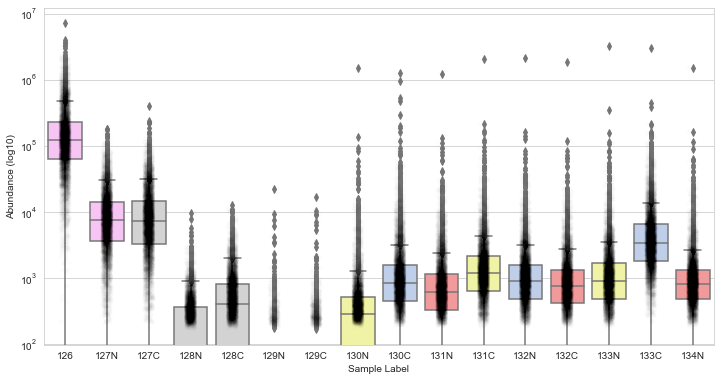

In [20]:
plt.figure(figsize=(12, 6.2025)) 

color_match = {"126": "#FFBDFC", "127N": "#FFBDFC", "127C": "#D3D3D3", "128N": "#D3D3D3",  "128C": "#D3D3D3",
               "129N": "#D3D3D3", "129C": "#D3D3D3", "130N": "#FCFF99", "130C": "#B8CDF0", "131N": "#FF8C8E",
               "131C": "#FCFF99", "132N": "#B8CDF0", "132C": "#FF8C8E", "133N": "#FCFF99", "133C": "#B8CDF0", "134N": "#FF8C8E",}

boxplot = sns.boxplot(data=psm_df, x="variable", y="value", palette = color_match, # hue = "value", # Recolor to match illustration, Change orderings to N, C
                      order=["126","127N","127C","128N","128C","129N","129C","130N",
                             "130C","131N","131C","132N","132C","133N","133C","134N"])

boxplot = sns.stripplot(data=psm_df, x="variable", y="value", color='0', jitter=True, alpha=0.01, 
                     order=["126","127N","127C","128N","128C","129N","129C","130N",
                            "130C","131N","131C","132N","132C","133N","133C","134N"])

boxplot.set(xlabel="Sample Label", ylabel="Abundance (log10)")
sns.set_style("whitegrid")
plt.yscale('log')

plt.savefig('proteinabundance.png', bbox_inches='tight', dpi=400)


In [ ]:
# Sample 1 = Boost (126)
# Sample 2 = 13C Spillover (127C)
# Sample 3 = Reference (127N)
# Sample 4 = Reference 15N Spillover
# Sample 5 = Double 13C Spillover?? (Just Blank)
# Sample 6 = Double 15N Spillover??? (Just Blank)
# Sample 7 = Blankiest Blank